In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pickle
import json
from sklearn.linear_model import Ridge,Lasso

In [4]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

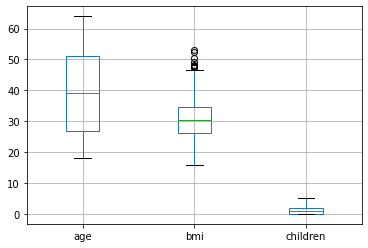

In [7]:
df[["age","bmi","children"]].boxplot()

C:\Users\malha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

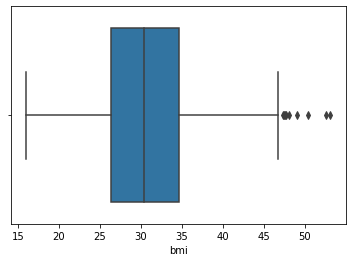

In [8]:
sns.boxplot(df["bmi"])

In [10]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)
iqr = q3 - q1
uppertail = q3 + 1.5 * iqr
print("uppertail",uppertail)
df.loc[(df["bmi"]>uppertail)]

uppertail 47.290000000000006


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [13]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [17]:
df1 = df.drop(["charges","sex","smoker","region"], axis=1)
x_constant = sm.add_constant(df1)
vif_list = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
s1 = pd.Series(vif_list,index=x_constant.columns)
print(s1)

const       31.954929
age          1.013816
bmi          1.012152
children     1.001874
dtype: float64


<AxesSubplot:>

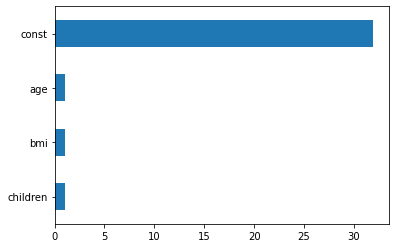

In [19]:
s1.sort_values().plot(kind="barh")

In [20]:
df.rename(columns={"sex":"gender"},inplace=True)

In [21]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df["gender"].replace({"male":0,"female":1},inplace=True)

In [29]:
df["smoker"].replace({"yes":1,"no":0},inplace= True)

In [30]:
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [31]:
df = pd.get_dummies(df,columns=["region"])
df.head()

KeyError: "None of [Index(['region'], dtype='object')] are in the [columns]"

In [32]:
x = df.drop("charges",axis=1)
y = df["charges"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [33]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred_test = lr_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33596915.85136146
mean_absolute_error 4181.194473753641
r2_score 0.7835929767120723
adjusted r2_score 0.7760438945043538


In [36]:
y_pred_train = lr_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
adj_r2 = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 37277681.70201866
mean_absolute_error 4208.234572492218
r2_score 0.7417255854683333
adjusted r2_score 0.7395326894958947


In [37]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)

Ridge()

In [38]:
y_pred_test = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33642947.83507098
mean_absolute_error 4193.348192170581
r2_score 0.7832964719788793
adjusted r2_score 0.7757370465827937


In [39]:
y_pred_train = ridge_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
adj_r2 = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 37280674.089588836
mean_absolute_error 4217.915238675179
r2_score 0.7417048530323971
adjusted r2_score 0.7395117810298419


In [40]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)

Lasso()

In [41]:
y_pred_test = lasso_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33605932.26390232
mean_absolute_error 4182.296979405319
r2_score 0.7835348995061961
adjusted r2_score 0.7759837913494355


In [42]:
y_pred_train = lasso_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
adj_r2 = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 37277711.06031092
mean_absolute_error 4208.468848637636
r2_score 0.7417253820625582
adjusted r2_score 0.7395324843630894


In [44]:
lasso_model.coef_

array([ 2.56973787e+02,  1.39773763e+01,  3.36892172e+02,  4.24687204e+02,
        2.36444097e+04,  6.49104379e+02,  2.78116811e+02, -0.00000000e+00,
       -1.52448881e+02])

<AxesSubplot:>

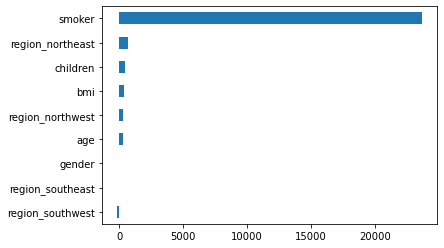

In [45]:
s1 = pd.Series(lasso_model.coef_,index=x.columns)
s1.sort_values().plot(kind="barh")

In [48]:
x_train1 = x_train.drop("gender",axis=1)
lasso_model.fit(x_train1,y_train)

Lasso()

In [49]:
x_test1 = x_test.drop("gender",axis=1)

In [51]:
y_pred_test = lasso_model.predict(x_test1)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test1.shape[0]-1))/(x_test1.shape[0]-x_test1.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33610155.04865906
mean_absolute_error 4182.911464796807
r2_score 0.7835076993821362
adjusted r2_score 0.7768206785136307


In [54]:
estimator_ridge = Ridge()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
gdsearchcv = GridSearchCV(estimator = estimator_ridge, param_grid = parameter_grid,cv = 5)
gdsearchcv.fit(x_train,y_train)
gdsearchcv.best_estimator_

Ridge(alpha=0.9600000000000001)

In [56]:
ridge_model = gdsearchcv.best_estimator_
y_pred_test = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33641004.689312056
mean_absolute_error 4192.86179883275
r2_score 0.7833089883179196
adjusted r2_score 0.7757499995383121


In [57]:
y_pred_train = ridge_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
adj_r2 = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 37280440.76364111
mean_absolute_error 4217.530143029805
r2_score 0.7417064696061697
adjusted r2_score 0.739513411329241


In [60]:
estimator_ridge = Ridge()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
rdsearchcv = RandomizedSearchCV(estimator_ridge,parameter_grid,cv=5)
rdsearchcv.fit(x_train,y_train)
rdsearchcv.best_estimator_

Ridge(alpha=0.75)

In [61]:
ridge_model = rdsearchcv.best_estimator_
y_pred_test = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33630941.17545382
mean_absolute_error 4190.3044367323355
r2_score 0.7833738101928652
adjusted r2_score 0.7758170826414535


In [62]:
y_pred_train = ridge_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
adj_r2 = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 37279369.8012353
mean_absolute_error 4215.505490028994
r2_score 0.7417138896541908
adjusted r2_score 0.7395208943776698


In [63]:
estimator_lasso = Lasso()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
gdsearchcv = GridSearchCV(estimator = estimator_lasso,param_grid=parameter_grid,cv=5)
gdsearchcv.fit(x_train,y_train)
gdsearchcv.best_estimator_

C:\Users\malha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1127512890.4959793, tolerance: 12659047.167726355
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.9899999999999998)

In [64]:
lasso_model = rdsearchcv.best_estimator_
y_pred_test = lasso_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 33630941.17545382
mean_absolute_error 4190.3044367323355
r2_score 0.7833738101928652
adjusted r2_score 0.7758170826414535


In [65]:
y_pred_train = lasso_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
adj_r2 = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_test.shape[1]-1))
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("r2_score",r2)
print("adjusted r2_score",adj_r2)

mean_squared_error 37279369.8012353
mean_absolute_error 4215.505490028994
r2_score 0.7417138896541908
adjusted r2_score 0.7395208943776698


In [66]:
with open("Linear_model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [67]:
project_data = {"gender":{"male":0,"female":1},"smoker":{"yes":1,"no":0},"columns":list(x.columns)}
project_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [69]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)